# 初始化

In [0]:
#@markdown - **挂载** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **卸载**
# !fusermount -u GoogleDrive

# 代码区

In [0]:
#@title 主成分分析 { display-mode: "both" }
# 该程序实现了通过主成分分析的方法使二维数据映射到一维数据，使得方差最大化
# 提供了梯度下降寻找特征值及特征向量和直接调用特征分解函数两种方法
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import linalg as LA


In [0]:
#@markdown - **参数设置**
x_input = np.array([[1, 1, 2, 4, 2], [1, 3, 3, 4, 4]])
x_dim = x_input.shape[0]
x_cov = np.cov(x_input)
w_dim = 1

num_epoch = 50 #@param {type: "integer"}
learning_rate = 8e-2 #@param {type: "number"}

In [0]:
#@markdown - **网络设置**
with tf.name_scope('Input'):
    x = tf.placeholder(tf.float32, shape=[x_dim, x_dim], name='x_cov')
    w = tf.Variable(tf.random_normal(shape=[x_dim, w_dim], stddev=0.1))
    lr = tf.Variable(2.)
    m_i = tf.matrix_diag(tf.ones([x_dim]))
with tf.name_scope('Output'):
    y1 = tf.matmul((x - lr * m_i), w)
    y2 = 1 - tf.matmul(w, w, transpose_a=True)
    y = tf.reduce_sum(tf.square(y1)) + tf.reduce_sum(tf.square(y2))

# 只能找到 lr 附近的特征值及对应的特征向量
with tf.name_scope('Train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(y)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#@markdown - **训练网络**
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epoch):
        _, w_v, lr_v, loss = sess.run([train_op, w, lr, y], feed_dict={x: x_cov})
        print_list = [epoch + 1, loss]
        if (epoch + 1) % 5 == 0:
            print('Epoch {0[0]}, loss function: {0[1]:.4f}.'.format(print_list))
    print('Training completed')
    print('w_v: ', w_v)
    print('lr_v: ', lr_v)

# 验证归一化条件
result = np.dot(w_v.T, w_v)
print('result:', result)

Epoch 5, loss function: 0.7003.
Epoch 10, loss function: 0.1010.
Epoch 15, loss function: 0.0910.
Epoch 20, loss function: 0.0595.
Epoch 25, loss function: 0.0413.
Epoch 30, loss function: 0.0128.
Epoch 35, loss function: 0.0167.
Epoch 40, loss function: 0.0042.
Epoch 45, loss function: 0.0071.
Epoch 50, loss function: 0.0011.
Training completed
w_v:  [[0.709915 ]
 [0.7249171]]
lr_v:  2.5028393
result: [[1.029484]]


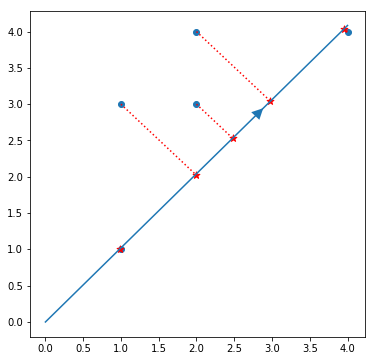

梯度下降法实现的降维特征： [1.4348321  2.88466632 3.59458131 5.73932838 4.31949842]
直接调用求特征值函数的降维特征： [1.41421356 2.82842712 3.53553391 5.65685425 4.24264069]


In [0]:
#@markdown - **画出降维后的数据与原数据的关系示意**
x_new = np.dot(w_v.T, x_input)
m = np.linspace(0, 4, 100)
k = w_v.flatten()[1] / w_v.flatten()[0]
n = k * m
x_p = (x_input[0] / k + x_input[1]) / (k + 1/k)
y_p = k * x_p
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
# 投影
for x0, x1, y0, y1 in zip(x_input[0], x_p, x_input[1], y_p):
  ax.plot([x0, x1], [y0, y1], 'r:')
ax.scatter(x_input[0], x_input[1])
ax.scatter(x_p, y_p, s=52, c='r', marker='*')
ax.plot(m, n)
dx = 0.3
dy = k * 0.3
ax.arrow(x_p[2], y_p[2], dx, dy, head_width=0.15, head_length=0.15, ec='none')
# plt.grid()
plt.show()
print('梯度下降法实现的降维特征：', x_new.flatten())

#@markdown - **直接调用求特征值函数实现降维**
w, v = LA.eig(x_cov)
x_new1 = np.dot(v[:,0].T, x_input)
print('直接调用求特征值函数的降维特征：', x_new1)